In [124]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [125]:
studentdf=pd.read_csv("studentperformance.csv")
studentdf.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,NaN,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,NaN,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,NaN,standard,completed,88,95,92
7,male,group B,NaN,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [126]:
studentdf.describe()

,mathscore,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,65.969000,69.169000,68.054000
std,15.310338,14.600192,15.195657
min,0.000000,17.000000,10.000000
25%,56.750000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [127]:
studentdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    774 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
mathscore                      1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [128]:
studentdf.drop(['lunch','test preparation course'],axis=1,inplace=False)
studentdf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,NaN,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,NaN,standard,none,76,78,75


In [129]:
studentdf['parental level of education']=studentdf['parental level of education'].fillna("High School")

In [130]:
studentdf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,High School,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,High School,standard,none,76,78,75


In [131]:
studentdf['race/ethnicity']=studentdf['race/ethnicity'].map({
    'group A':'Asian',
    'group B':'African',
    'group C':'Afro-Asian',
    'group D':'American',
    'group E':'European',
})

In [132]:
studentdf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,reading score,writing score
0,female,African,bachelor's degree,standard,none,72,72,74
1,female,Afro-Asian,High School,standard,completed,69,90,88
2,female,African,master's degree,standard,none,90,95,93
3,male,Asian,associate's degree,free/reduced,none,47,57,44
4,male,Afro-Asian,High School,standard,none,76,78,75


In [133]:
pd.crosstab(studentdf['gender'],studentdf['test preparation course'])

test preparation course,completed,none
gender,,
female,184,334
male,174,308


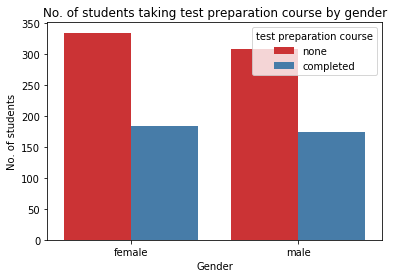

In [134]:
ax1=sb.countplot(x=studentdf['gender'],hue=studentdf['test preparation course'],palette='Set1')
ax1.set(title='No. of students taking test preparation course by gender',xlabel='Gender',ylabel='No. of students')
plt.show()

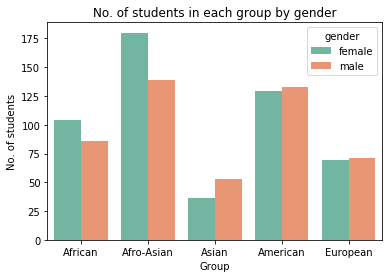

In [135]:
ax2=sb.countplot(hue=studentdf['gender'],x=studentdf['race/ethnicity'],palette='Set2')
ax2.set(title='No. of students in each group by gender',xlabel='Group',ylabel='No. of students')
plt.show()

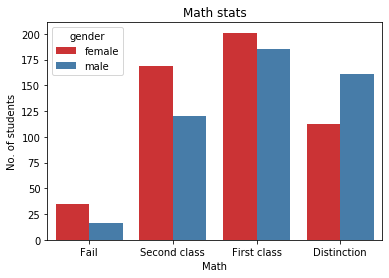

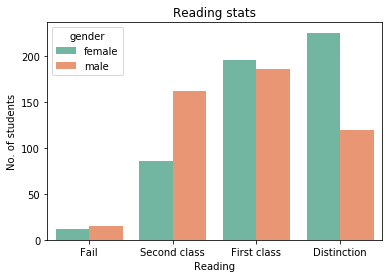

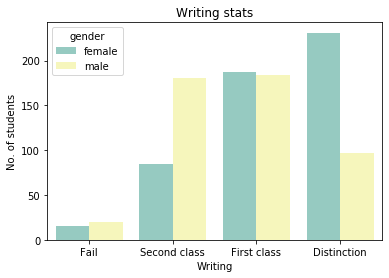

In [136]:
interval=(0,40,60,75,100)
categories=['Fail','Second class','First class','Distinction']
studentdf['mathclass']=pd.cut(studentdf['mathscore'],interval,labels=categories)
studentdf['writeclass']=pd.cut(studentdf['writing score'],interval,labels=categories)
studentdf['readclass']=pd.cut(studentdf['reading score'],interval,labels=categories)
ax3=sb.countplot(x=studentdf['mathclass'],hue=studentdf['gender'],palette='Set1')
ax3.set(title='Math stats',xlabel='Math',ylabel='No. of students')
plt.show()
ax4=sb.countplot(x=studentdf['readclass'],hue=studentdf['gender'],palette='Set2')
ax4.set(title='Reading stats',xlabel='Reading',ylabel='No. of students')
plt.show()
ax5=sb.countplot(x=studentdf['writeclass'],hue=studentdf['gender'],palette='Set3')
ax5.set(title='Writing stats',xlabel='Writing',ylabel='No. of students')
plt.show()

In [137]:
studentdf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,reading score,writing score,mathclass,writeclass,readclass
0,female,African,bachelor's degree,standard,none,72,72,74,First class,First class,First class
1,female,Afro-Asian,High School,standard,completed,69,90,88,First class,Distinction,Distinction
2,female,African,master's degree,standard,none,90,95,93,Distinction,Distinction,Distinction
3,male,Asian,associate's degree,free/reduced,none,47,57,44,Second class,Second class,Second class
4,male,Afro-Asian,High School,standard,none,76,78,75,Distinction,First class,Distinction


In [138]:
studentdf.groupby('race/ethnicity').mean()

,mathscore,reading score,writing score
race/ethnicity,,,
African,63.452632,67.352632,65.600000
Afro-Asian,64.282132,69.103448,67.827586
American,67.362595,70.030534,70.145038
Asian,61.629213,64.674157,62.674157
European,73.378571,73.028571,71.407143
